In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [5]:
# Load dataset
df = pd.read_csv(r"C:\Users\p\Downloads\Leads.csv")

In [7]:
# Data Cleaning: Replace 'Select' with NaN
df.replace('Select', np.nan, inplace=True)

In [9]:
# Drop columns with more than 50% missing values
columns_to_drop = [
    "How did you hear about X Education", "Lead Profile", "Lead Quality", 
    "Asymmetrique Profile Score", "Asymmetrique Activity Score", 
    "Asymmetrique Profile Index", "Asymmetrique Activity Index"
]
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
# Fill missing categorical values with mode
categorical_cols = ["City", "Specialization", "Tags", "What matters most to you in choosing a course", 
                    "What is your current occupation", "Country", "Last Activity", "Lead Source"]
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
# Fill missing numerical values with median
numerical_cols = ["TotalVisits", "Page Views Per Visit"]
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [15]:
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)

In [17]:
# Define target and features
y = df['Converted']
X = df.drop(columns=['Converted'])

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [27]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_rep = classification_report(y_test, y_pred)

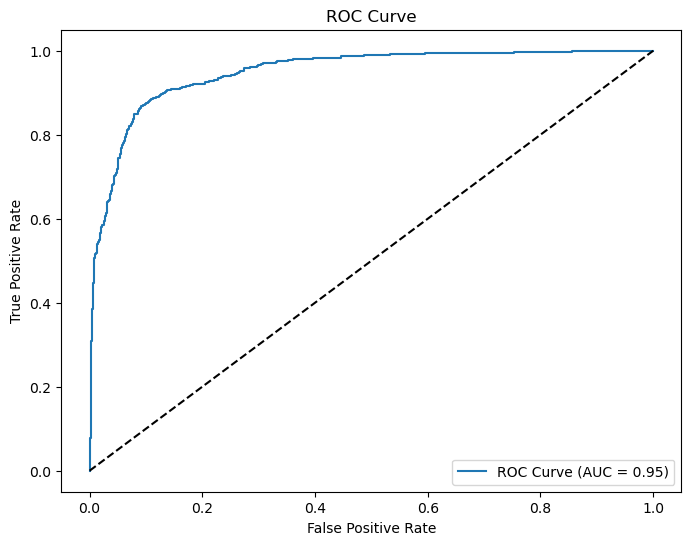

In [29]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [31]:
# Print Evaluation Metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.88
ROC AUC Score: 0.95
Confusion Matrix:
 [[1041   66]
 [ 163  578]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1107
           1       0.90      0.78      0.83       741

    accuracy                           0.88      1848
   macro avg       0.88      0.86      0.87      1848
weighted avg       0.88      0.88      0.87      1848



In [33]:
#Assign Lead Scores (Scaling Probability to 0-100)
df['Lead_Score'] = (model.predict_proba(scaler.transform(X))[:, 1] * 100).astype(int)

In [35]:
# Save the Lead Scores to a CSV File
df[['Lead_Score', 'Converted']].to_csv("lead_scores.csv", index=False)

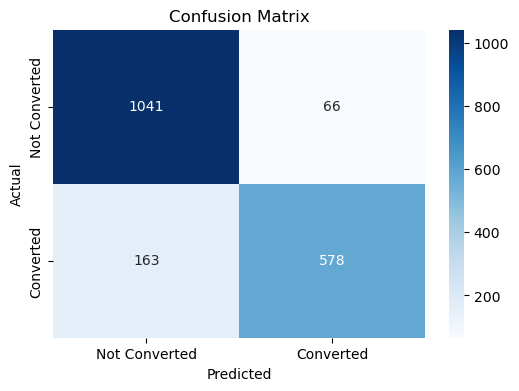

In [37]:
#Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

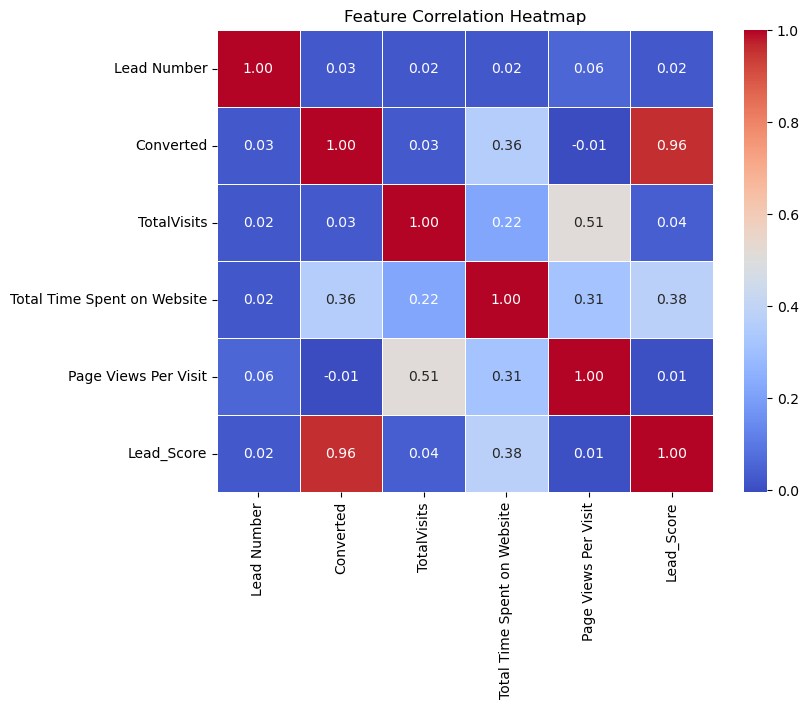

In [41]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.png")

C:\Users\p\AppData\Local\Temp\ipykernel_1696\853322130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Converted"], palette="Set2")


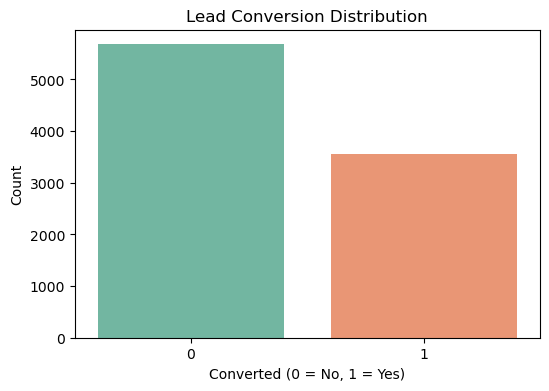

In [43]:
# Lead Conversion Distribution
if "Converted" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df["Converted"], palette="Set2")
    plt.title("Lead Conversion Distribution")
    plt.xlabel("Converted (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.savefig("lead_conversion_distribution.png")

In [45]:
print("Lead scoring process completed successfully!")

Lead scoring process completed successfully!
